# Setting up

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import sys
import os
import gc
import psutil
import numpy as np
import xarray as xr
import holoviews as hv
import matplotlib.pyplot as plt
import bokeh.plotting as bpl
import dask.array as da
import pandas as pd
import dask
import datashader as ds
import itertools as itt
import papermill as pm
import ast
import functools as fct
import SimpleITK as sitk
import cv2
import itertools as itt
import numba as nb
from scipy.stats import zscore
from holoviews.operation.datashader import datashade, regrid, dynspread
from datashader.colors import Sets1to3
from dask.diagnostics import ProgressBar, Profiler
from IPython.core.display import display, HTML
from dask.distributed import Client, progress, LocalCluster, fire_and_forget
minian_path = "."
sys.path.append(minian_path)
from minian.utilities import load_params, load_videos, scale_varr, scale_varr_da, save_variable, open_minian, save_minian, handle_crash
from minian.preprocessing import remove_brightspot, gradient_norm, denoise, remove_background, stripe_correction
from minian.motion_correction import estimate_shift_fft, apply_shifts, interpolate_frame, mask_shifts
from minian.initialization import seeds_init, gmm_refine, pnr_refine, intensity_refine, ks_refine, seeds_merge, initialize
from minian.cnmf import psd_welch, psd_fft, get_noise, update_spatial, update_temporal, unit_merge, smooth_sig
from minian.visualization import VArrayViewer, CNMFViewer, generate_videos, visualize_seeds, visualize_gmm_fit, visualize_spatial_update, visualize_temporal_update, roi_draw
from IPython.core.debugger import set_trace

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
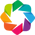

In [2]:
hv.notebook_extension('bokeh', width=100)
pbar = ProgressBar(minimum=2)
pbar.register()

# function definition

In [3]:
def smooth_and_resample(image, shrink_factor, smoothing_sigma):
    """
    Args:
        image: The image we want to resample.
        shrink_factor: A number greater than one, such that the new image's size is original_size/shrink_factor.
        smoothing_sigma: Sigma for Gaussian smoothing, this is in physical (image spacing) units, not pixels.
    Return:
        Image which is a result of smoothing the input and then resampling it using the given sigma and shrink factor.
    """
    smoothed_image = sitk.SmoothingRecursiveGaussian(image, smoothing_sigma)
    
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()
    new_size = [int(sz/float(shrink_factor) + 0.5) for sz in original_size]
    new_spacing = [((original_sz-1)*original_spc)/(new_sz-1) 
                   for original_sz, original_spc, new_sz in zip(original_size, original_spacing, new_size)]
    return sitk.Resample(smoothed_image, new_size, sitk.Transform(), 
                         sitk.sitkLinear, image.GetOrigin(),
                         new_spacing, image.GetDirection(), 0.0, 
                         image.GetPixelID())


    
def multiscale_demons(registration_algorithm,
                      fixed_image, moving_image, initial_transform = None, 
                      shrink_factors=None, smoothing_sigmas=None):
    """
    Run the given registration algorithm in a multiscale fashion. The original scale should not be given as input as the
    original images are implicitly incorporated as the base of the pyramid.
    Args:
        registration_algorithm: Any registration algorithm that has an Execute(fixed_image, moving_image, displacement_field_image)
                                method.
        fixed_image: Resulting transformation maps points from this image's spatial domain to the moving image spatial domain.
        moving_image: Resulting transformation maps points from the fixed_image's spatial domain to this image's spatial domain.
        initial_transform: Any SimpleITK transform, used to initialize the displacement field.
        shrink_factors: Shrink factors relative to the original image's size.
        smoothing_sigmas: Amount of smoothing which is done prior to resmapling the image using the given shrink factor. These
                          are in physical (image spacing) units.
    Returns: 
        SimpleITK.DisplacementFieldTransform
    """
    # Create image pyramid.
    fixed_images = [fixed_image]
    moving_images = [moving_image]
    if shrink_factors:
        for shrink_factor, smoothing_sigma in reversed(list(zip(shrink_factors, smoothing_sigmas))):
            fixed_images.append(smooth_and_resample(fixed_images[0], shrink_factor, smoothing_sigma))
            moving_images.append(smooth_and_resample(moving_images[0], shrink_factor, smoothing_sigma))
    
    # Create initial displacement field at lowest resolution. 
    # Currently, the pixel type is required to be sitkVectorFloat64 because of a constraint imposed by the Demons filters.
    if initial_transform:
        initial_displacement_field = sitk.TransformToDisplacementField(initial_transform, 
                                                                       sitk.sitkVectorFloat64,
                                                                       fixed_images[-1].GetSize(),
                                                                       fixed_images[-1].GetOrigin(),
                                                                       fixed_images[-1].GetSpacing(),
                                                                       fixed_images[-1].GetDirection())
    else:
        initial_displacement_field = sitk.Image(fixed_images[-1].GetWidth(), 
                                                fixed_images[-1].GetHeight(),
                                                fixed_images[-1].GetDepth(),
                                                sitk.sitkVectorFloat64)
        initial_displacement_field.CopyInformation(fixed_images[-1])
 
    # Run the registration.            
    initial_displacement_field = registration_algorithm.Execute(fixed_images[-1], 
                                                                moving_images[-1], 
                                                                initial_displacement_field)
    # Start at the top of the pyramid and work our way down.    
    for f_image, m_image in reversed(list(zip(fixed_images[0:-1], moving_images[0:-1]))):
            initial_displacement_field = sitk.Resample (initial_displacement_field, f_image)
            initial_displacement_field = registration_algorithm.Execute(f_image, m_image, initial_displacement_field)
    return sitk.DisplacementFieldTransform(initial_displacement_field)

In [4]:
def scale(a):
    amax = np.nanmax(a)
    amin = np.nanmin(a)
    return (a - amin) / (amax - amin)

def demon(fix, mov, niter=10, std=1.0, fix_lb=None):
    fix_ma = hist_match(mov, fix, fix_lb=fix_lb)
    im_fix = sitk.GetImageFromArray(fix)
    im_mov = sitk.GetImageFromArray(mov)
    im_fix_dm = sitk.GetImageFromArray(fix_ma)
    im_mov_dm = sitk.GetImageFromArray(mov)
    demons = sitk.DiffeomorphicDemonsRegistrationFilter()
    demons.SetNumberOfIterations(niter)
    demons.SetStandardDeviations(std)
    demons.SetMaximumUpdateStepLength(20)
    demons.SetUseGradientType(demons.Fixed)
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(im_fix)
    resampler.SetInterpolator(sitk.sitkLinear)
    outTx = multiscale_demons(
        demons, im_fix_dm, im_mov_dm,
        shrink_factors = None,
        smoothing_sigmas = None)
    resampler.SetTransform(outTx)
    im_out = resampler.Execute(im_mov)
    out = sitk.GetArrayFromImage(im_out)
    return out

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def hist_match(fix, mov, mean_thres=False, nlevels=256, npoints=10, fix_lb=None, ext_search=0, nupdate=100, corr_thres=0.6):
    matcher = sitk.HistogramMatchingImageFilter()
    matcher.SetNumberOfHistogramLevels(nlevels)
    matcher.SetNumberOfMatchPoints(npoints)
    matcher.SetThresholdAtMeanIntensity(mean_thres)
    if fix_lb is None:
        fix_lb = np.ones_like(fix).astype(np.int)
    im_out = np.zeros_like(fix)
    reg_ls = [(l, np.mean(fix[fix_lb==l])) for l in np.unique(fix_lb)]
    labs = [t[0] for t in sorted(reg_ls, key=lambda t: t[1])[-nupdate:]]
    for lb in labs:
        if lb == -1:
            continue
        cur_mask = fix_lb == lb
        if not np.sum(cur_mask) > 1:
            continue
        # corr = np.corrcoef(fix[cur_mask], mov[cur_mask])[0, 1]
        # if not corr > corr_thres:
        #     continue
        h0, h1, w0, w1 = bbox(cur_mask)
        h0, w0 = (np.clip(h0 - ext_search, 0, None),
                  np.clip(w0 - ext_search, 0, None))
        h1, w1 = (h1 + ext_search,
                  w1 + ext_search)
        mask_bb = cur_mask[h0:h1, w0:w1]
        cur_fix = fix[h0:h1, w0:w1].copy()
        cur_fix[~mask_bb] = 0
        cur_mov = mov[h0:h1, w0:w1].copy()
        cur_mov[~mask_bb] = 0
        im_fix = sitk.GetImageFromArray(cur_fix)
        im_mov = sitk.GetImageFromArray(cur_mov)
        im_mov_ma = matcher.Execute(im_mov, im_fix)
        cur_out = sitk.GetArrayFromImage(im_mov_ma)
        im_out[h0:h1, w0:w1] = np.where(
            mask_bb, cur_out, im_out[h0:h1, w0:w1])
    ele = cv2.getStructuringElement(
        cv2.MORPH_RECT, (3, 3))
    im_out = cv2.morphologyEx(im_out, cv2.MORPH_CLOSE, ele)
    return im_out


def lin_match(fix, mov, fix_lb=None):
    if fix_lb is None:
        fix_lb = np.ones_like(fix).astype(np.int)
    im_out = np.zeros_like(fix)
    for lb in np.unique(fix_lb):
        if lb == -1:
            continue
        cur_mask = fix_lb == lb
        if not np.sum(cur_mask) > 1:
            continue
        dl_ele = cv2.getStructuringElement(
            cv2.MORPH_RECT, (5, 5))
        # cur_mask_dl = cv2.dilate(
        #     cur_mask.astype(np.uint8), dl_ele)
        h0, h1, w0, w1 = bbox(cur_mask)
        h0, w0 = np.clip(h0 - 5, 0, None), np.clip(w0 - 5, 0, None)
        h1, w1 = h1 + 5, w1 + 5
        # cur_fix = fix[h0:h1, w0:w1]
        cur_fix = fix[cur_mask]
        cur_mov = mov[cur_mask]
        cur_mov_norm = ((cur_mov - cur_mov.min())
                        / (cur_mov.max() - cur_mov.min()))
        cur_mov_norm = (cur_mov_norm * (cur_fix.max() - cur_fix.min())
                        + cur_fix.min())
        im_out[cur_mask] = cur_mov_norm
    ele = cv2.getStructuringElement(
        cv2.MORPH_RECT, (3, 3))
    im_out = cv2.morphologyEx(im_out, cv2.MORPH_CLOSE, ele)
    return im_out


def anisotropic_filter(img, niter=10):
    im = sitk.GetImageFromArray(img)
    ani_filter = sitk.GradientAnisotropicDiffusionImageFilter()
    ani_filter.SetNumberOfIterations(niter)
    im_ft = ani_filter.Execute(im)
    im_out = sitk.GetArrayFromImage(im_ft)
    return im_out


def otsu_thres(img):
    img_max = np.nanmax(img)
    img_min = np.nanmin(img)
    img = ((img - img_min) * 255 / (img_max - img_min)).astype(np.uint8)
    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return ret2, th2


def local_max(img, ksize=10):
    ele = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
    img_max = cv2.dilate(img, ele)
    return np.logical_and((img == img_max), img)

def reg_max(img):
    img_lb = cv2.connectedComponents(
        img.astype(np.uint8), connectivity=8)[1]
    im_out = np.zeros_like(img)
    for lb in np.unique(img_lb):
        cur_mask = img_lb == lb
        cur_img = img.copy()
        cur_img[~cur_mask] = 0
        max_crd = np.unravel_index(
            np.argmax(cur_img), cur_img.shape)
        im_out[max_crd] = 1
    return im_out


def watershed(img, img_mk):
    img_max = np.nanmax(img)
    img_min = np.nanmin(img)
    img = ((img - img_min) * 255 / (img_max - img_min)).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return cv2.watershed(img, img_mk)


def watershed_mask(img, thres, mask=None):
    if mask is None:
        mask = np.zeros_like(img)
    img_bin = (img > thres).astype(np.uint8)
    if (not np.sum(img_bin) > 0) or img_bin.all():
        return img_bin
    img_dist = cv2.distanceTransform(
        img_bin, distanceType=cv2.DIST_L2,
        maskSize=cv2.DIST_MASK_PRECISE)
    max_dist = np.max(img_dist)
    max_dist = int(np.ceil(np.mean(img_dist)))
    try:
        dl_ele = cv2.getStructuringElement(
            cv2.MORPH_RECT, (max_dist, max_dist))
    except:
        set_trace()
    img_bg = ~cv2.dilate(img_bin, dl_ele).astype(bool)
    # img_bg = ~img_bin
    img_max_reg = reg_max(img_dist)
    img_max_loc = local_max(img_dist)
    img_max = np.logical_and(img_max_reg, img_max_loc)
    # img_max = img_max_loc
    img_mk = cv2.connectedComponents(
        img_max.astype(np.uint8), connectivity=8)[1]
    mask_mk = np.logical_and(img_mk, mask)
    img_mk[mask_mk.nonzero()] = 0
    img_mk = np.where(img_mk, img_mk + np.max(mask), 0)
    img_mk = img_mk + mask
    img_mk[img_bg] = np.max(img_mk) + 1
    img_max = np.max(img)
    img_min = np.min(img)
    img8 = ((img - img_min) * 255 / (img_max - img_min)).astype(np.uint8)
    img8 = cv2.cvtColor(img8, cv2.COLOR_GRAY2RGB)
    img_ws = cv2.watershed(img8, img_mk.astype(np.int32))
    return img_ws


def watershed_recur(img, levels=None):
    if levels is None:
        levels = np.quantile(img, np.linspace(1, 0, 20))
    res_ls = []
    mask = np.zeros_like(img)
    for lv in levels:
        img_ws = watershed_mask(img, lv, mask)
        res_ls.append(img_ws)
        bg_crds = (img_ws == img_ws.max()).nonzero()
        # cnt_crds = (img_ws == -1).nonzero()
        mask = img_ws.copy()
        mask[bg_crds] = 0
        # mask[cnt_crds] = 0
    return np.stack(res_ls, axis=-1)

def local_corrcoef(a):
    a = a.reshape((a.shape[0], -1))
    cor = np.corrcoef(a)
    return np.mean(cor[4, :])


@nb.jit(nopython=True, nogil=True)
def local_corr(a, ksize=5):
    ct = int((ksize - 1) / 2)
    box = [(x, y) for x in np.arange(ksize) for y in np.arange(ksize)]
    sur_crds = list(set(box) - set([(ct, ct)]))
    corrs = []
    hh, ww = a.shape[1], a.shape[2]
    for h in range(hh):
        for w in range(ww):
            h0, h1 = h-ct, h+ct+1
            w0, w1 = w-ct, w+ct+1
            if (h0 < 0) or (h1 > hh) or (w0 < 0) or (w1 > ww):
                cur_corr = np.nan
            else:
                cur_a = a[:, h0:h1, w0:w1]
                crs = [np.corrcoef(
                    cur_a[:, ct, ct], cur_a[:, c[0], c[1]])[0, 1] for c in sur_crds]
                cur_corr = np.mean(np.array(crs))
            corrs.append(cur_corr)
    return np.array(corrs).reshape((1, a.shape[1], a.shape[2]))


def corr_coef(a):
    corr = np.zeros((a.shape[1], a.shape[2]))


def convolve_mean(img, ksize=11):
    kernel = np.ones((ksize, ksize), np.float) / (ksize ** 2 - 1)
    cent = int((ksize - 1) / 2)
    kernel[cent, cent] = 0
    return cv2.filter2D(img, -1, kernel)


@nb.jit(nopython=True, nogil=True)
def pair_corr(a, b):
    return np.corrcoef(a, b)[0, 1]

# opening data and preparation

In [ ]:
dpath = "/media/share/hdda/Denise/Wired_Valence/Wired_Valence_Organized_Data/MS104/1/H14_M32_S36"
fname = "minian.1547287575"

In [5]:
dpath = "/media/share/csstorage/Tristan/Epilepsy Revision Experiments/PFD/OrganizedandAnalyzed/PFD2/PFD2ByAnimal/TS45-4/S13"
fname = "minian"

In [6]:
minian = open_minian(
    dpath=dpath,
    fname=fname,
    backend='zarr', chunks=dict(frame='auto', height='auto', width='auto'))

In [7]:
mov = minian['Y'].isel(frame=slice(0, 1000))

In [ ]:
mov = xr.apply_ufunc(
    anisotropic_filter,
    mov.chunk(dict(height=-1, width=-1, frame='auto')),
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[mov.dtype])

In [8]:
mov = scale_varr(mov, (0, 255)).astype(np.uint8)

In [9]:
%%time
mov = mov.persist()

[########################################] | 100% Completed | 11.3s
CPU times: user 6.04 s, sys: 3.53 s, total: 9.57 s
Wall time: 11.3 s


In [ ]:
%%time
mov_mean = xr.apply_ufunc(
    convolve_mean,
    mov.chunk(dict(height=-1, width=-1, frame='auto')),
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[mov.dtype])
corr_conv = xr.apply_ufunc(
    pair_corr,
    mov.chunk(dict(frame=-1, height='auto', width='auto')),
    mov_mean.chunk(dict(frame=-1, height='auto', width='auto')),
    input_core_dims=[['frame'], ['frame']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[mov.dtype])
corr_conv = corr_conv.compute()

In [ ]:
%%time
mov_ovlp = da.overlap.overlap(
    (mov.chunk(dict(frame=-1, height='auto', width='auto')).data),
    depth={1:2, 2:2}, boundary={1:'reflect', 2:'reflect'})
temp = mov_ovlp.map_blocks(
    local_corr, chunks=((1,), mov_ovlp.chunks[1], mov_ovlp.chunks[2]))
temp = da.overlap.trim_internal(temp, {1:2, 2:2})
temp = temp.compute()
temp = xr.DataArray(
    temp.squeeze(), dims=['height', 'width'],
    coords=dict(height=mov.coords['height'], width=mov.coords['width']))
temp = temp.fillna(0).astype(mov.dtype)

In [ ]:
%%output size=60
%%opts Image [height=480, width=752, colorbar=True] (cmap='Viridis')
hv.Image(temp, ['width', 'height']) + hv.Image(corr_conv, ['width', 'height']).redim.range(Y=(0.7, 1))

In [10]:
mov_max = mov.max('frame')
mov_max = mov_max.compute()

In [ ]:
%%output size=60
%%opts Image [height=480, width=752, colorbar=True] (cmap='Viridis')
hv.Image(mov_max, ['width', 'height'])

# mser for seeds

In [ ]:
def crd_to_mask(crd, shape):
    ma = np.zeros(shape)
    ma[crd[:, 0], crd[:, 1]] = 1
    return ma

In [ ]:
import cv2
from minian.utilities import scale_varr
mser = cv2.MSER_create(_delta=1, _max_variation=0.5, _max_area=400)
mser.setPass2Only(True)
regions, _ = mser.detectRegions(mov_max.values)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)).reshape(-1, 2) for p in regions]
mask = np.stack([crd_to_mask(r, (752, 480)) for r in regions], axis=0)
cnts = [np.around(np.mean(p, axis=0)).astype(int) for p in regions]

In [ ]:
%%output size=60
%%opts Contours [colorbar=True]
opts = dict(plot=dict(height=480, width=752), style=dict(cmap='Viridis'))
img = hv.Image(mov_max8, kdims=['width', 'height'])
regrid(img).opts(**opts) + hv.operation.contours(img, levels=20).opts(**opts)

In [ ]:
%%output size=60
%%opts Contours [colorbar=True]
opts = dict(plot=dict(height=480, width=752), style=dict(cmap='Viridis'))
img = hv.Image(mov_max, kdims=['width', 'height'])
regrid(img).opts(**opts) * hv.Points(cnts).opts(color='red')

In [12]:
def crd_to_mask(crd, shape):
    ma = np.zeros(shape)
    ma[crd[:, 0], crd[:, 1]] = 1
    return ma

def mser(img):
    mser = cv2.MSER_create(_delta=1, _max_variation=0.25, _max_area=400)
    mser.setPass2Only(True)
    regions, _ = mser.detectRegions(img)
    mask = np.stack([crd_to_mask(r, (752, 480)).T for r in regions], axis=0)
    return mask

def desc_hu(img):
    return cv2.HuMoments(cv2.moments(img)).squeeze()


def desc_prop(img):
    pass

In [293]:
# mov_max = mov.max('frame').compute()
mov_max = mov.isel(frame=30).compute()
fm0 = mov.isel(frame=0).compute()
R = cv2.getRotationMatrix2D((752/2, 480/2), 30, 1)
fm0 = xr.apply_ufunc(
    cv2.warpAffine,
    fm0,
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']],
    kwargs=dict(M=R, dsize=(752, 480)))
fm0 = mov.isel(frame=0).compute()
def norm(a):
    amin = np.nanmin(a)
    amax = np.nanmax(a)
    return (a - amin) / (amax - amin) * 255
mov_max = xr.apply_ufunc(
    norm,
    mov_max,
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']])
mov_max = mov_max.astype(np.uint8)
fm0 = xr.apply_ufunc(
    norm,
    fm0,
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']])
fm0 = fm0.astype(np.uint8)
mask_max = mser(mov_max.values)
mask_fm0 = mser(fm0.values)

In [294]:
mask_max = np.stack([np.where(m, mov_max.values, 0) for m in mask_max], axis=0)
mask_fm0 = np.stack([np.where(m, fm0.values, 0) for m in mask_fm0], axis=0)
# mask_fm0 = sorted(mask_fm0, key=lambda a: np.sum(a > 0))
# mask_fm0 = np.stack(mask_fm0[:int(len(mask_fm0)/4)], axis=0)
# mask_fm0 = np.stack(mask_fm0[-3:], axis=0)

In [295]:
from scipy.ndimage.measurements import center_of_mass
def com(im):
    return center_of_mass(im, (~np.isnan(im)).astype(int))

def clean_masks(mask):
    cnt = np.around(np.stack([com(im) for im in mask], axis=0))
    ucnt = np.unique(cnt, axis=0)
    mask_ls = []
    for uc in ucnt:
        ugrp = (cnt == uc).all(axis=1)
        cur_mask = mask[ugrp, :, :]
        cur_m_idx = np.argmax((cur_mask > 0).sum(axis=-1).sum(axis=-1))
        m = cur_mask[cur_m_idx, :, :]
        mask_ls.append(m)
    return np.stack(mask_ls, axis=0)

mask_max = clean_masks(mask_max)
mask_fm0 = clean_masks(mask_fm0)

In [305]:
mask_fm0 = sorted(mask_fm0, key=lambda a: np.nanmean(a[a>0]))
mask_fm0 = mask_fm0[-20:]

In [306]:
def gen_ang_bins(r, ang_bins):
    d = 2 * r + 1
    xs, ys = np.meshgrid(np.arange(d), np.arange(d))
    xs, ys = xs - r, ys - r
    ang = np.arctan2(ys, xs) + np.pi
    bin_sz = 2 * np.pi / ang_bins
    bin_ls = []
    for i in range(ang_bins):
        cur_ma = np.logical_and(ang >= i * bin_sz, ang <= (i + 1) * bin_sz)
        cur_ma[r, r] = False
        bin_ls.append(cur_ma)
    bin_ang = np.stack(bin_ls, axis=0)
    dist = np.sqrt(xs ** 2 + ys ** 2)
    return bin_ang, dist
    
    
def vec(im, norm_mag=False):
    gx = cv2.Sobel(im, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3).astype(float)
    gy = cv2.Sobel(im, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3).astype(float)
    mag = np.sqrt(gx ** 2 + gy ** 2)
    if norm_mag:
        mag = (mag - mag.min()) / (mag.max() - mag.min()) * 2 * np.pi
    ang = np.arctan2(gy, gx)
    return np.stack((ang, mag), axis=-1)


def desc_cell(im, mask, wnd=15, ang_bins=8, dist_bins=5):
    mask = mask.astype(bool)
    im_ma = np.where(mask, im, np.nan)
    cnt = np.around(com(im_ma)).astype(int)
    l0, h0, l1, h1 = cnt[0]-wnd, cnt[0]+wnd+1, cnt[1]-wnd, cnt[1]+wnd+1
    if any((l0 < 0, l1 < 0, h0 > im.shape[0], h1 > im.shape[1])):
        return None
    im_sub = im[l0:h0, l1:h1]
    ma_sub = np.expand_dims(mask[l0:h0, l1:h1], axis=-1)
    grd = vec(im_sub)
    grd = np.where(ma_sub, grd, np.nan)
    bins_a, dist = gen_ang_bins(wnd, ang_bins)
    _, bins_d = np.histogram(dist[ma_sub.squeeze()])
    # bins_d = np.arange(dist_bins+1)
    dsc_ls = []
    ma_ls = []
    for iang, idist in itt.product(range(ang_bins), range(dist_bins)):
        d_ma = np.logical_and(dist >= bins_d[idist], dist <= bins_d[idist+1])
        ma = np.logical_and(d_ma, bins_a[iang])
        ma_ls.append(ma)
        cur_dsc = np.nanmean(grd[ma].reshape((-1, 2)), axis=0)
        dsc_ls.append(cur_dsc)
    ma = np.stack(ma_ls, axis=0)
    dsc = np.stack(dsc_ls, axis=0).reshape(-1)
    return dsc, grd, im_sub, cnt, ma

In [307]:
res_ls_max = [desc_cell(mov_max.values, m) for m in mask_max]
res_ls_fm0 = [desc_cell(fm0.values, m) for m in mask_fm0]

/opt/miniconda3/envs/minian/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


In [308]:
res_ls_max = list(filter(lambda x: x is not None, res_ls_max))
res_ls_fm0 = list(filter(lambda x: x is not None, res_ls_fm0))

In [309]:
desc_max = np.stack([r[0] for r in res_ls_max], axis=0)
desc_fm0 = np.stack([r[0] for r in res_ls_fm0], axis=0)
grd_max = np.stack([r[1] for r in res_ls_max], axis=0)
grd_fm0 = np.stack([r[1] for r in res_ls_fm0], axis=0)
im_max = np.stack([r[2] for r in res_ls_max], axis=0)
im_fm0 = np.stack([r[2] for r in res_ls_fm0], axis=0)
cnt_max = np.stack([r[3] for r in res_ls_max], axis=0)
cnt_fm0 = np.stack([r[3] for r in res_ls_fm0], axis=0)

In [310]:
kps_max = [cv2.KeyPoint(x, y, _size=3, _class_id=1) for y, x in cnt_max]
kps_fm0 = [cv2.KeyPoint(x, y, _size=3, _class_id=1) for y, x in cnt_fm0]

In [ ]:
kaze = cv2.KAZE_create(extended=True, nOctaves=8)
_, dsc_max = kaze.compute(mov_max.values, kps_max)
_, dsc_fm0 = kaze.compute(fm0.values, kps_fm0)

orb = cv2.ORB_create()
_, dsc_max = orb.compute(mov_max.values, kps_max)
_, dsc_fm0 = orb.compute(fm0.values, kps_fm0)

# kps_max, dsc_max = kaze.detectAndCompute(mov_max.values, None)
# kps_fm0, dsc_fm0 = kaze.detectAndCompute(fm0.values, None)
# cnt_max = np.stack([[p.pt[1], p.pt[0]] for p in kps_max])
# cnt_fm0 = np.stack([[p.pt[1], p.pt[0]] for p in kps_fm0])

# desc_max = np.concatenate([cnt_max, 1e2 * dsc_max], axis=1)
# desc_fm0 = np.concatenate([cnt_fm0, 1e2 * dsc_fm0], axis=1)

# mov = mov.compute()
# dtemp_max = np.stack([mov.sel(height=h, width=w).values for h, w in cnt_max], axis=0)
# dtemp_fm0 = np.stack([mov.sel(height=h, width=w).values for h, w in cnt_fm0], axis=0)

def norm(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))

# desc_max = np.concatenate([1000 * norm(dsc_max), 64 * norm(dtemp_max)], axis=1)
# desc_fm0 = np.concatenate([1000 * norm(dsc_fm0), 64 * norm(dtemp_fm0)], axis=1)

# desc_max = dsc_max
# desc_fm0 = dsc_fm0

In [311]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(np.nan_to_num(desc_fm0).astype(np.float32), np.nan_to_num(desc_max).astype(np.float32))

In [290]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(np.nan_to_num(desc_fm0.astype(np.float32)), np.nan_to_num(desc_max.astype(np.float32)), k=3)
# matches = flann.knnMatch(desc_max.astype(np.float32), desc_fm0.astype(np.float32), k=2)
good = []
for ms in matches:
    if ms[0].distance < 0.95 * ms[1].distance:
        good.append(ms[0])
matches = sum(matches, [])

In [312]:
%%output size=80
%%opts RGB [height=480, width=752*2]
img_ma = cv2.drawMatches(fm0.values, kps_fm0, mov_max.values, kps_max, matches, None)
# img_ma = cv2.drawMatches(mov_max.values, kps_max, fm0.values, kps_fm0, good, None)
hv.RGB(img_ma)

:RGB   [x,y]   (R,G,B)

In [303]:
match_df = (pd.DataFrame(
    dict(qidx=[m.queryIdx for m in matches], tidx=[m.trainIdx for m in matches]))
            .reset_index())
match_df['qx'] = cnt_fm0[match_df['qidx'], 1]
match_df['qy'] = cnt_fm0[match_df['qidx'], 0]
match_df['tx'] = cnt_max[match_df['tidx'], 1]
match_df['ty'] = cnt_max[match_df['tidx'], 0]

H, hma = cv2.findHomography(match_df[['tx', 'ty']].values, match_df[['qx', 'qy']].values, method=0, ransacReprojThreshold=3)

fm0_trans = xr.apply_ufunc(
    cv2.warpPerspective,
    fm0.compute(),
    input_core_dims=[['height', 'width']],
    output_core_dims=[['height', 'width']],
    kwargs=dict(M=H, dsize=(752, 480)))

hma = hma.squeeze().astype(bool)

In [304]:
%%output size=60
opts_im = dict(plot=dict(width=752, height=480), style=dict(cmap='gray'))
opts_pts = dict(plot=dict(tools=['hover']), style=dict(size=3, color='index', cmap='Category20'))
(hv.Image(fm0, ['width', 'height']).opts(**opts_im) * hv.Points(match_df[hma], ['qx', 'qy'], ['index']).opts(**opts_pts)
 + hv.Image(mov_max, ['width', 'height']).opts(**opts_im) * hv.Points(match_df[hma], ['tx', 'ty'], ['index']).opts(**opts_pts)
 + hv.Image(fm0_trans, ['width', 'height']).opts(**opts_im)
)

:Layout
   .Overlay.I  :Overlay
      .Image.I  :Image   [width,height]   (Y)
      .Points.I :Points   [qx,qy]   (index)
   .Overlay.II :Overlay
      .Image.I  :Image   [width,height]   (Y)
      .Points.I :Points   [tx,ty]   (index)
   .Image.I    :Image   [width,height]   (Y)

In [279]:
def plot_grd_match(mid, match_df, grd_fm0, im_fm0, grd_max, im_max):
    qid = match_df.loc[mid, 'qidx']
    tid = match_df.loc[mid, 'tidx']
    grd0, im0 = grd_fm0[qid, :, :], im_fm0[qid, :, :]
    grd1, im1 = grd_max[tid, :, :], im_max[tid, :, :]
    xs, ys = np.meshgrid(np.arange(grd0.shape[0]), np.arange(grd0.shape[1]))
    return (hv.Image((xs, ys, im0))
            + hv.VectorField((xs, ys, grd0[:, :, 0], grd0[:, :, 1])).opts(magnitude='Magnitude')
            + hv.Image((xs, ys, im1))
            + hv.VectorField((xs, ys, grd1[:, :, 0], grd1[:, :, 1])).opts(magnitude='Magnitude'))

In [282]:
(plot_grd_match(3, match_df, grd_fm0, im_fm0, grd_max, im_max)
 + plot_grd_match(4, match_df, grd_fm0, im_fm0, grd_max, im_max)
 + plot_grd_match(5, match_df, grd_fm0, im_fm0, grd_max, im_max)).cols(4)

:Layout
   .Image.I         :Image   [x,y]   (z)
   .VectorField.I   :VectorField   [x,y]   (Angle,Magnitude)
   .Image.II        :Image   [x,y]   (z)
   .VectorField.II  :VectorField   [x,y]   (Angle,Magnitude)
   .Image.III       :Image   [x,y]   (z)
   .VectorField.III :VectorField   [x,y]   (Angle,Magnitude)
   .Image.IV        :Image   [x,y]   (z)
   .VectorField.IV  :VectorField   [x,y]   (Angle,Magnitude)
   .Image.V         :Image   [x,y]   (z)
   .VectorField.V   :VectorField   [x,y]   (Angle,Magnitude)
   .Image.VI        :Image   [x,y]   (z)
   .VectorField.VI  :VectorField   [x,y]   (Angle,Magnitude)

In [ ]:
%%output size=60
%%opts Image [width=752, height=480] (cmap='Viridis')
(hv.Image(mov.isel(frame=0).rename('fm0'), ['width', 'height']) + hv.Image(mov.isel(frame=30).rename('fm30'), ['width', 'height'])
 + hv.Image(mov.isel(frame=60).rename('fm60'), ['width', 'height']) + hv.Image(mov_max.rename('max'), ['width', 'height'])
).cols(2)

In [ ]:
mov_sub = mov.sel(height=slice(240, 340), width=slice(480, 560)).compute()
mov_max_sub = mov_max.sel(height=slice(240, 340), width=slice(480, 560)).compute()

In [ ]:
def lap(im):
    return xr.apply_ufunc(
        cv2.Laplacian,
        im,
        input_core_dims=[['height', 'width']],
        output_core_dims=[['height', 'width']],
        kwargs=dict(ddepth=cv2.CV_8U))

def sob(im):
    return xr.apply_ufunc(
        cv2.Sobel,
        im,
        input_core_dims=[['height', 'width']],
        output_core_dims=[['height', 'width']],
        kwargs=dict(ddepth=cv2.CV_8U, dx=1, dy=1))

def vec(im):
    gx = cv2.Sobel(im, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3).astype(float)
    gy = cv2.Sobel(im, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3).astype(float)
    mag = np.sqrt(gx ** 2 + gy ** 2)
    ang = np.arctan2(gy, gx)
    return np.stack((mag, ang), axis=-1)

def vec_xr(im):
    v_xr = xr.apply_ufunc(
        vec,
        im,
        input_core_dims=[['height', 'width']],
        output_core_dims=[['height', 'width', 'v']],
        output_sizes=dict(v=2))
    v_xr = v_xr.rename('vv').assign_coords(v=['mag', 'ang'])
    v_df = v_xr.to_dataframe()['vv'].unstack().reset_index()
    return v_df

In [ ]:
(hv.Image(mov_sub.isel(frame=0).rename('0'), ['width', 'height']) + hv.VectorField(vec_xr(mov_sub.isel(frame=0)).rename(columns=dict(mag='mag0')), kdims=['width', 'height'], vdims=['ang', 'mag0']).opts(magnitude='mag0')
 + hv.Image(mov_sub.isel(frame=30).rename('30'), ['width', 'height']) + hv.VectorField(vec_xr(mov_sub.isel(frame=30)).rename(columns=dict(mag='mag30')), kdims=['width', 'height'], vdims=['ang', 'mag30']).opts(magnitude='mag30')
 + hv.Image(mov_sub.isel(frame=60).rename('60'), ['width', 'height']) + hv.VectorField(vec_xr(mov_sub.isel(frame=60)).rename(columns=dict(mag='mag60')), kdims=['width', 'height'], vdims=['ang', 'mag60']).opts(magnitude='mag60')
 + hv.Image(mov_max_sub.rename('max'), ['width', 'height']) + hv.VectorField(vec_xr(mov_max_sub), kdims=['width', 'height'], vdims=['ang', 'mag']).opts(magnitude='mag')
).cols(4)

In [ ]:
v_max = vec_xr(mov.max('frame'))
hv.VectorField(v_max, kdims=['width', 'height'], vdims=['ang', 'mag']).opts(magnitude='mag') + hv.Image(mov.max('frame'), ['width', 'height'])

In [ ]:
def norm(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def norm_2s(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a)) * 2 - 1
desc_max = np.concatenate([1e3 * norm(cnt_max), 1e3 * np.ptp(1e3 * dsc_fm0) / np.ptp(cnt_fm0) * norm_2s(dsc_max)], axis=1)
desc_fm0 = np.concatenate([1e3 * norm(cnt_fm0), 1e3 * np.ptp(1e3 * dsc_fm0) / np.ptp(cnt_fm0) * norm_2s(dsc_fm0)], axis=1)

# watershed for independent regions

In [ ]:
%%output size=60
%%opts Image [colorbar=True]
from itertools import cycle
from bokeh.palettes import Category20_20
levels = np.linspace(0.98, 0.9, 5)
# levels = [250, 200, 150, 100, 50]
opts_plt = dict(height=480, width=752)
opts_sty = dict(cmap='Viridis')
temp_ws = xr.apply_ufunc(watershed_recur, temp, input_core_dims=[['height', 'width']], output_core_dims=[['height', 'width', 'level']], kwargs=dict(levels=levels))
temp_ws = temp_ws.assign_coords(level=levels)
cur_cmap = {k: v for k, v in zip(np.unique(temp_ws), cycle(Category20_20))}
hv_res = (hv.Image(temp.rename('temp'), ['width', 'height']).opts(plot=opts_plt, style=opts_sty) +
 hv.Dataset(temp_ws.rename('ws')).to(hv.Image, ['width', 'height']).opts(plot=opts_plt, style=dict(cmap=list(cur_cmap.values())))).cols(2)
hv_res

# histogram matching

In [ ]:
%%output size=60
%%opts Image [height=480, width=752, colorbar=True] (cmap='Viridis')
%%opts Contours [height=480, width=752, colorbar=True] (cmap='Viridis')
hist_mask = temp_ws.isel(level=-1).values
hist_mask = np.where(hist_mask == hist_mask.max(), -1, hist_mask)
im_mov = mov.isel(frame=5).compute()
im_fix = temp.compute()
im_fix_ma_hist = xr.apply_ufunc(
    hist_match, im_mov, im_fix,
    input_core_dims=[['height', 'width'], ['height', 'width']],
    output_core_dims=[['height', 'width']],
    kwargs=dict(fix_lb=hist_mask, npoints=10, corr_thres=0, nupdate=100)
)
im_fix_ma = xr.apply_ufunc(
    lin_match, im_mov, im_fix,
    input_core_dims=[['height', 'width'], ['height', 'width']],
    output_core_dims=[['height', 'width']],
    kwargs=dict(fix_lb=hist_mask)
)
hv_mov = hv.Image(im_mov.rename('mov'), ['width', 'height'])
hv_fix_ma = hv.Image(im_fix_ma.rename('fix_ma'), ['width', 'height'])
hv_fix_ma_hist = hv.Image(im_fix_ma_hist.rename('fix_ma'), ['width', 'height'])
hv_fix = hv.Image(im_fix.rename('fix'), ['width', 'height'])
(hv_mov + hv.operation.contours(hv_mov)
# + hv_fix_ma + hv.operation.contours(hv_fix_ma)
 + hv_fix_ma_hist + hv.operation.contours(hv_fix_ma_hist)
 + hv_fix + hv.operation.contours(hv_fix)).cols(2)

# demons registration

In [ ]:
mov_demon = xr.apply_ufunc(
    demon,
    temp.chunk(dict(height=-1, width=-1)),
    mov.chunk(dict(height=-1, width=-1, frame='auto')),
    input_core_dims=[['height', 'width'], ['height', 'width']],
    output_core_dims=[['height', 'width']],
    kwargs=dict(niter=5, std=1.0, fix_lb=hist_mask),
    vectorize=True,
    dask='parallelized',
    output_dtypes=[mov.dtype])

In [ ]:
%%time
with ProgressBar():
    mov_demon = mov_demon.persist()

In [ ]:
mov

In [ ]:
from skvideo.io import vwrite
mov_norm = scale_varr(mov, (0, 255)).astype(np.uint8)
mov_demon_norm = scale_varr(mov_demon, (0, 255)).astype(np.uint8)
vid = xr.concat([mov_norm, mov_demon_norm], 'width')
with ProgressBar():
    vwrite(os.path.join(dpath, "mc_demon_diff.mp4"), vid.transpose('frame', 'height', 'width'))

In [ ]:
%%output size=60
%%opts Image [height=480, width=752, colorbar=True] (cmap='Viridis')
mov_max = mov.max('frame').compute()
mov_demon_max = mov_demon.max('frame').compute()
hv.Image(mov_max, ['width', 'height']) + hv.Image(mov_demon_max, ['width', 'height'])

# intensity threshold for seeds

In [ ]:
from scipy.ndimage.measurements import center_of_mass
def centroids(img):
    img_max = np.max(img)
    img_min = np.min(img)
    img8 = ((img - img_min) * 255 / (img_max - img_min)).astype(np.uint8)
    mask = np.zeros_like(img)
    cmps, img_lb = cv2.connectedComponents(img8, connectivity=8)
    for cmp in range(1, np.max(img_lb)):
        cur_cmp = img_lb == cmp
        if np.sum(cur_cmp) > 20:
            cnt_crds = center_of_mass(cur_cmp)
            cnt_crds = tuple([c.astype(int) for c in cnt_crds])
            mask[cnt_crds] = 1
    return mask

In [ ]:
im_bin = (mov > (40/255)).astype(np.float)
im_bin_cnt = xr.apply_ufunc(centroids, im_bin, input_core_dims=[['height', 'width']], output_core_dims=[['height', 'width']], vectorize=True, dask='parallelized', output_dtypes=[im_bin.dtype])
im_bin_cnt_proj = im_bin_cnt.sum('frame').compute()
im_bin_proj = im_bin.sum('frame').compute()

In [ ]:
%%output size=60
%%opts Image [height=480, width=752, colorbar=True] (cmap='Viridis')
%%opts Contours [height=480, width=752, colorbar=True] (cmap='Viridis')
hv.Image(temp.rename('temp'), ['width', 'height']) + hv.Image((im_bin_proj > 0).astype(np.int) + (im_bin_cnt_proj > 0).astype(np.int), ['width', 'height'])